In [100]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint

from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, tree
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.impute import SimpleImputer

In [98]:
# Auxiliar Functions

def printRegResults(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    
    print("Resultados da Regressão:")
    print(f"MAE  (Erro Absoluto Médio):   {mae:7.4f}")
    print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:7.4f}")
    print(f"R²   (Coeficiente de Determinação):   {r2:7.4f}")

In [97]:
#Dados do csv
all_data = pd.read_csv("custom_covid19.csv")

# Substituir valores inválidos por NaN ANTES de usar os dados
cols_exceto_idade = all_data.columns.difference(['AGE'])
all_data[cols_exceto_idade] = all_data[cols_exceto_idade].replace({97: np.nan, 98: np.nan, 99: np.nan})
# Aplica conversão para 0 e 1
for col in all_data:
    if col != "AGE" and col != "TEST_RESULT":
        all_data[col] = all_data[col].replace({2: 0})



# Criar feature: número total de doenças
doenca_cols = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HYPERTENSION',
               'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC']
all_data["PCT_DOENCAS"] = all_data[doenca_cols].mean(axis=1)

# Criar feature: gravidade clínica
grav_cols = ['ICU', 'INTUBED', 'PNEUMONIA']
all_data['GRAVIDADE'] = all_data[grav_cols].sum(axis=1)

all_data["MULTI_COMORB"] = (all_data[doenca_cols].sum(axis=1) >= 2).astype(int)

#Teste positivo a covid19
all_data["COVID_POSITIVO"] = (all_data["TEST_RESULT"] <= 3).astype(int)

# Separar X e y
X = all_data.drop(columns=["AGE", "DATE_DIED", "MEDICAL_UNIT","USMER"])
y = all_data["AGE"]

# Dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputar os valores que falta com a mediana dos valores
imp = SimpleImputer(strategy='median')
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

# Normalizar os dados 0-1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
# Inddependet Test set
test_data = pd.read_csv("proj-test-data.csv")

# Substituir valores inválidos por NaN
cols_exceto_idade = test_data.columns.difference(['AGE'])
test_data[cols_exceto_idade] = test_data[cols_exceto_idade].replace({97: np.nan, 98: np.nan, 99: np.nan})
for col in test_data:
    if col != "AGE" and col != "TEST_RESULT":
        test_data[col] = test_data[col].replace({2: 0})

# Criar features da mesma forma
test_data["PCT_DOENCAS"] = test_data[doenca_cols].mean(axis=1)
test_data['GRAVIDADE'] = test_data[grav_cols].sum(axis=1)
test_data["MULTI_COMORB"] = (test_data[doenca_cols].sum(axis=1) >= 2).astype(int)
test_data["COVID_POSITIVO"] = (test_data["TEST_RESULT"] <= 3).astype(int)

X_test_data = test_data.drop(columns=["AGE", "DATE_DIED", "MEDICAL_UNIT","USMER"])
y_test_data = test_data["AGE"]

X_train_test_data, X_test_test_data, y_train_test_data, y_test_test_data = train_test_split(X_test_data, y_test_data, test_size=0.2, random_state=42)

imp = SimpleImputer(strategy='median')
X_train_test_data = imp.fit_transform(X_train_test_data)
X_test_test_data = imp.transform(X_test_test_data)


scaler = StandardScaler()
X_train_test_data = scaler.fit_transform(X_train_test_data)
X_test_test_data = scaler.transform(X_test_test_data)

Resultados da Regressão:
MAE  (Erro Absoluto Médio):   11.4251
RMSE (Raiz do Erro Quadrático Médio): 14.6500
R²   (Coeficiente de Determinação):    0.2541


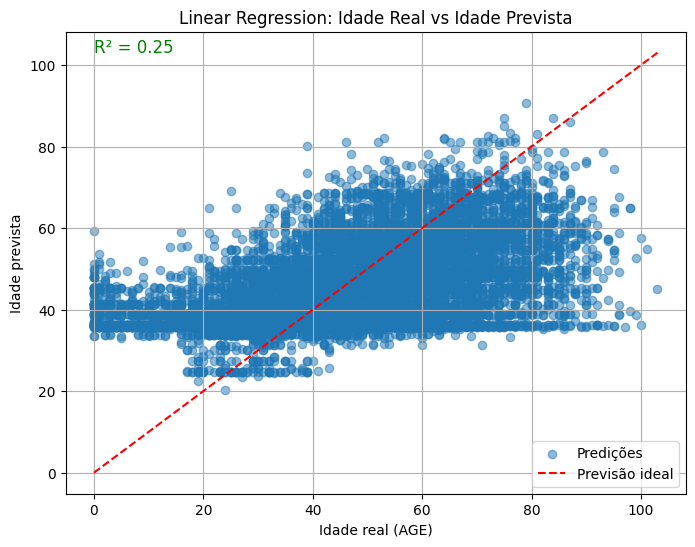

In [102]:
#regressão linear
mdl = LinearRegression()
mdl.fit(X_train, y_train)

y_predict = mdl.predict(X_test)

printRegResults(y_test, y_predict)

plt.figure(figsize=(8,6))

# Gráfico de dispersão
plt.scatter(y_test, y_predict, alpha=0.5, label='Predições')

# Linha ideal (previsão perfeita)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Previsão ideal')

# Rótulos e título
plt.xlabel("Idade real (AGE)")
plt.ylabel("Idade prevista")
plt.title("Linear Regression: Idade Real vs Idade Prevista")
plt.legend()
plt.grid(True)

# Coeficiente de determinação R²
r2 = r2_score(y_test, y_predict)
plt.text(y_test.min(), y_test.max(), f"R² = {r2:.2f}", fontsize=12, color='green')

plt.show()

In [108]:
#independen test Linear Regression
mdl_test_data = LinearRegression()
mdl_test_data.fit(X_train_test_data, y_train_test_data)

y_predict_test_data = mdl.predict(X_test_test_data)

printRegResults(y_test_test_data, y_predict_test_data)

Resultados da Regressão:
MAE  (Erro Absoluto Médio):   10.5341
RMSE (Raiz do Erro Quadrático Médio): 12.2838
R²   (Coeficiente de Determinação):    0.5206


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Resultados da Regressão:
MAE  (Erro Absoluto Médio):   11.2820
RMSE (Raiz do Erro Quadrático Médio): 14.4702
R²   (Coeficiente de Determinação):    0.2723
Melhores parâmetros: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 25}


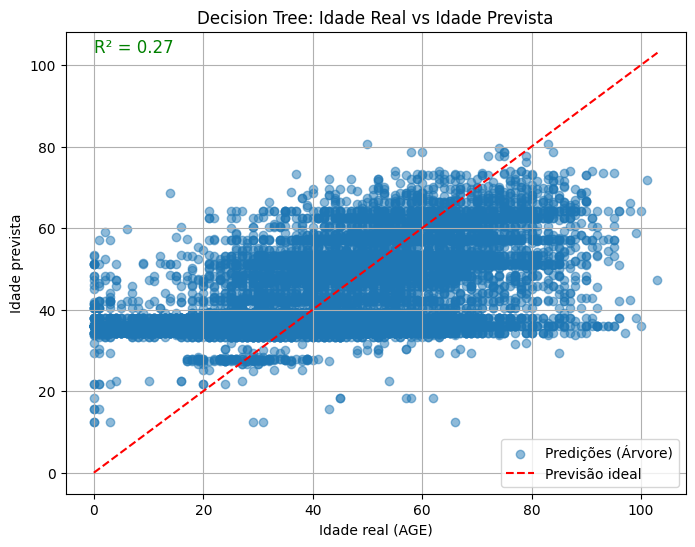

In [103]:
#Decision tree
tree = DecisionTreeRegressor(random_state=42)

# Gama de valores mais ampla
param_dist = {
    'max_depth': [ 10 ,20, 30, 50,100],
    'min_samples_split': randint(2, 30),
    'min_samples_leaf': randint(1, 20),
    'max_features': [ 'sqrt', 'log2', None]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=tree,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Treinar
random_search.fit(X_train, y_train)

# Melhor modelo encontrado
best_tree = random_search.best_estimator_

# Prever e avaliar
y_pred_tree = best_tree.predict(X_test)
printRegResults(y_test, y_pred_tree)
print("Melhores parâmetros:", random_search.best_params_)


plt.figure(figsize=(8,6))

# Gráfico de dispersão das predições
plt.scatter(y_test, y_pred_tree, alpha=0.5, label='Predições (Árvore)')

# Linha ideal (previsão perfeita)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Previsão ideal')

# Rótulos e título
plt.xlabel("Idade real (AGE)")
plt.ylabel("Idade prevista")
plt.title("Decision Tree: Idade Real vs Idade Prevista")
plt.legend()
plt.grid(True)

# R² (coeficiente de determinação)
r2 = r2_score(y_test, y_pred_tree)
plt.text(y_test.min(), y_test.max(), f"R² = {r2:.2f}", fontsize=12, color='green')

plt.show()


In [111]:
tree = DecisionTreeRegressor(random_state=42)

# Gama de valores mais ampla
param_dist = {
    'max_depth': [ 10 ,20, 30],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': [ 'sqrt', 'log2', None]
}

# RandomizedSearchCV
random_search_test_data = RandomizedSearchCV(
    estimator=tree,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# Treinar
random_search_test_data.fit(X_train, y_train)

# Melhor modelo encontrado
best_tree_test_data = random_search_test_data.best_estimator_

# Prever e avaliar
y_pred_tree_test_data = best_tree_test_data.predict(X_test_test_data)
printRegResults(y_test_test_data, y_pred_tree_test_data)
print("Melhores parâmetros:", random_search_test_data.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Resultados da Regressão:
MAE  (Erro Absoluto Médio):   10.9899
RMSE (Raiz do Erro Quadrático Médio): 12.8290
R²   (Coeficiente de Determinação):    0.4771
Melhores parâmetros: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 7, 'min_samples_split': 7}


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Resultados da Regressão:
MAE  (Erro Absoluto Médio):   11.2436
RMSE (Raiz do Erro Quadrático Médio): 14.4092
R²   (Coeficiente de Determinação):    0.2784
Melhores parâmetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


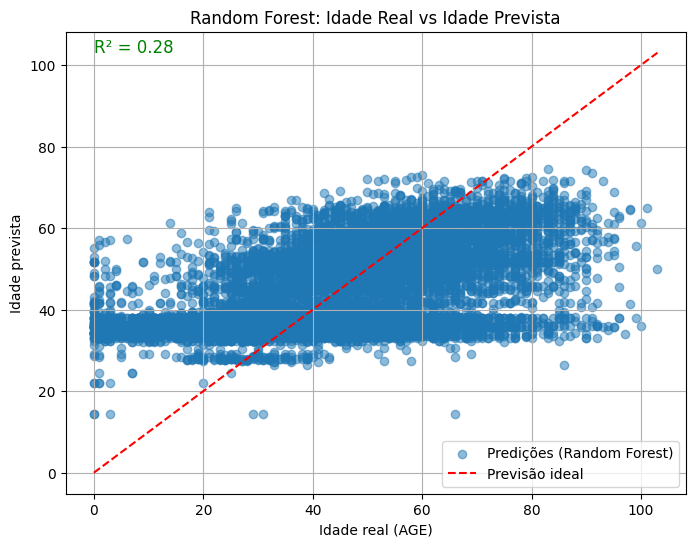

In [104]:
# RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Define o grid de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# Executa a busca nos dados de treino
grid_search.fit(X_train, y_train)

# Testa com vários parametros para encontrar os melhores para o modelo
best_rf = grid_search.best_estimator_

# Faz previsões com o melhor modelo
y_pred = best_rf.predict(X_test)

printRegResults(y_test, y_pred)
print("Melhores parâmetros:", grid_search.best_params_)

plt.figure(figsize=(8,6))

# Gráfico de dispersão das predições
plt.scatter(y_test, y_pred, alpha=0.5, label='Predições (Random Forest)')

# Linha ideal (previsão perfeita)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Previsão ideal')

# Rótulos e título
plt.xlabel("Idade real (AGE)")
plt.ylabel("Idade prevista")
plt.title("Random Forest: Idade Real vs Idade Prevista")
plt.legend()
plt.grid(True)

# Coeficiente R²
r2 = r2_score(y_test, y_pred)
plt.text(y_test.min(), y_test.max(), f"R² = {r2:.2f}", fontsize=12, color='green')

plt.show()

In [113]:
rf_model = RandomForestRegressor(random_state=42)

# Define o grid de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


grid_search_test_data = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    verbose=2
)

# Executa a busca nos dados de treino
grid_search_test_data.fit(X_train_test_data, y_train_test_data)

# Testa com vários parametros para encontrar os melhores para o modelo
best_rf_test_data = grid_search_test_data.best_estimator_

# Faz previsões com o melhor modelo
y_pred_test_data = best_rf_test_data.predict(X_test_test_data)

printRegResults(y_test_test_data, y_pred_test_data)
print("Melhores parâmetros:", grid_search_test_data.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Resultados da Regressão:
MAE  (Erro Absoluto Médio):   11.4008
RMSE (Raiz do Erro Quadrático Médio): 13.1006
R²   (Coeficiente de Determinação):    0.4547
Melhores parâmetros: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Resultados da Regressão:
MAE  (Erro Absoluto Médio):   11.4945
RMSE (Raiz do Erro Quadrático Médio): 14.8440
R²   (Coeficiente de Determinação):    0.2342
Melhores parâmetros: {'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'uniform'}


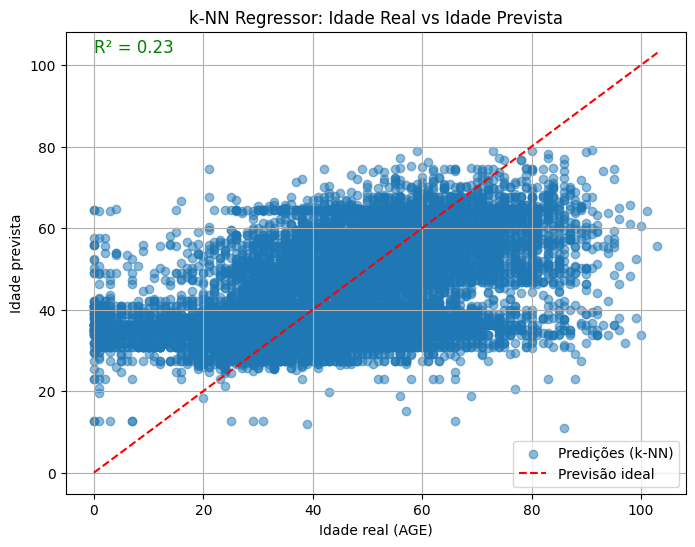

In [105]:
# KNeighborsRegressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_grid = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid.fit(X_train, y_train)

y_pred = grid.predict(X_test)

printRegResults(y_test, y_pred)
print("Melhores parâmetros:", grid.best_params_)

plt.figure(figsize=(8,6))

# Dispersão das previsões
plt.scatter(y_test, y_pred, alpha=0.5, label='Predições (k-NN)')

# Linha de previsão ideal (perfeita)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         color='red', linestyle='--', label='Previsão ideal')

# Rótulos e título
plt.xlabel("Idade real (AGE)")
plt.ylabel("Idade prevista")
plt.title("k-NN Regressor: Idade Real vs Idade Prevista")
plt.legend()
plt.grid(True)

# Coeficiente de determinação R²
r2 = r2_score(y_test, y_pred)
plt.text(y_test.min(), y_test.max(), f"R² = {r2:.2f}", fontsize=12, color='green')

plt.show()

In [ ]:
Resultados da Regressão K Neighbors:
MAE  (Erro Absoluto Médio):   11.4945
RMSE (Raiz do Erro Quadrático Médio): 14.8440
R²   (Coeficiente de Determinação):    0.2342
Melhores parâmetros: {'knn__n_neighbors': 10, 'knn__p': 1, 'knn__weights': 'uniform'}

In [114]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())
])

param_grid_test_data = {
    'knn__n_neighbors': [3, 5, 7, 10],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # p=1: Manhattan, p=2: Euclidean
}

grid_test_data = GridSearchCV(pipeline, param_grid_test_data, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_test_data.fit(X_train_test_data, y_train_test_data)

y_pred_test_data = grid_test_data.predict(X_test_test_data)

printRegResults(y_test_test_data, y_pred_test_data)
print("Melhores parâmetros:", grid_test_data.best_params_)

Resultados da Regressão:
MAE  (Erro Absoluto Médio):   11.7929
RMSE (Raiz do Erro Quadrático Médio): 14.4576
R²   (Coeficiente de Determinação):    0.3359
Melhores parâmetros: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'uniform'}
